In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

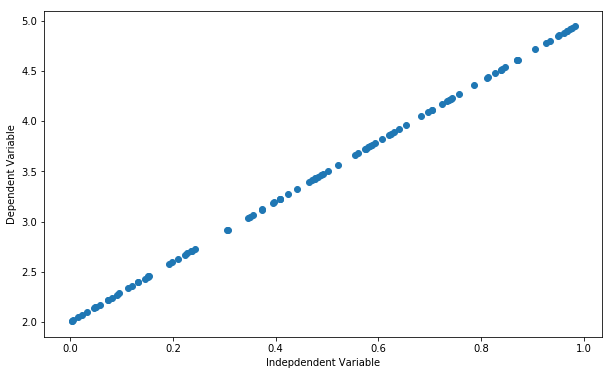

In [11]:
x_data = np.random.rand(100).astype(np.float32)
y_data = 3*x_data + 2

plt.scatter(x_data,y_data) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

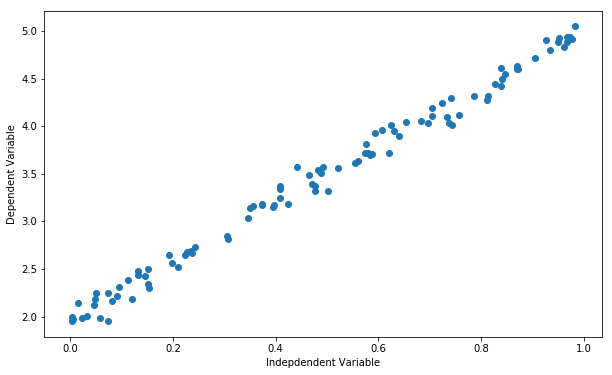

In [12]:
#Adding some noise to the above data
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

plt.scatter(x_data,y_data) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [95]:
#step 1: Prepare/ready data
data = zip(x_data, y_data)
n_samples = 100

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(1.0, name='weights')
b = tf.Variable(0.2, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.reduce_mean(tf.square(Y - Y_predicted, name='loss'))

## Optimization Step

We will use TensorFlow's default *tf.train.GradientDescentOptimizer class* as our optimizer.
We have to do **2 things**:
    1. Create class object
    2. call the minimize() function
Here we first created a tf.train.GradientDescentOptimizer class object named **optimizer** by passing the ***learning_rate***.

Then we have to minimize the above **loss function**. We can do it by just calling the ***optimizer.minimize(loss)*** function.

We can **vary* the learning_rate***. 

| learning_rate | MSE after 50 epochs | W     | b     | Number of epochs|
| ------------- |:-------------------:| -----:| -----:| ---------------:|
| .001          | .024                | 2.61  |2.19   |  50             |
| .01           | .0083               | 3.02  |1.96   |  50             |
| .1            | .0094               | 3.027 |1.957  |  50             |
| .5            | .026                | 3.05  |2.09   |  50             |
| .7            | .218                | 2.26  |2.10   |  50             |
| .8            | **NAN**             | NAN   |NAN    |  50             |
| .9            | **NAN**             | NAN   |NAN    |  50             |

For some values of the learning_rate gradient may explode or disperse, resulting in exponential decay of the gradient. For example, in the above table we see for our case if **learning_rate is 0.8** then the loss increases exponentially. After 7 epochs it becomes ***inifinite***. For **learning_rate is 0.9** we get ***inifinite*** loss in the first iteration.

To resolve this, we have to clip gradient by using **Clip_by_global_norm()** function. Clipping must be done before gradient descent applied. In the above mentioned method, we are minimizing gradient directly which is actually composition of two steps:

<span style="color:blue">optimizer.minimize(loss) = optimizer.compute_gradients(loss) + optimizer.apply_gradients()</span>

After compting gradient and before applying it we have to clip gradient. 

[A good link for tensorflow optimizer](https://applenob.github.io/tf_6.html) 

In [ ]:
# Step 6: using gradient descent with learning rate 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
#train_step = optimizer.minimize(loss)

'''
optimizer.minimize(loss) = optimizer.compute_gradients(loss) + optimizer.apply_gradients()
'''

#gra_and_var = optimizer.compute_gradients(loss)
#clipped_gradients, norm = tf.clip_by_global_norm(gra_and_var,5)
##train_step = optimizer.apply_gradients(gra_and_var)
#train_step = optimizer.apply_gradients(zip(clipped_gradients, [u,w,b]))

gradients, vriables = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 1.25)
train_step = optimizer.apply_gradients(zip(gradients, vriables))

In [96]:
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 

    # Step 8: train the model
    for i in range(50): # train the model 100 epochs
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([train_step, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
    print('MSE after 50 epochs:{}'.format(total_loss/n_samples))
    w, b = sess.run([w, b]) 
    print('w = {0} b = {1}'.format(w, b))

Epoch 0: 0.189526271274
Epoch 1: 0.0263570621078
Epoch 2: 0.0263570591543
Epoch 3: 0.0263570591543
Epoch 4: 0.0263570591543
Epoch 5: 0.0263570591543
Epoch 6: 0.0263570591543
Epoch 7: 0.0263570591543
Epoch 8: 0.0263570591543
Epoch 9: 0.0263570591543
Epoch 10: 0.0263570591543
Epoch 11: 0.0263570591543
Epoch 12: 0.0263570591543
Epoch 13: 0.0263570591543
Epoch 14: 0.0263570591543
Epoch 15: 0.0263570591543
Epoch 16: 0.0263570591543
Epoch 17: 0.0263570591543
Epoch 18: 0.0263570591543
Epoch 19: 0.0263570591543
Epoch 20: 0.0263570591543
Epoch 21: 0.0263570591543
Epoch 22: 0.0263570591543
Epoch 23: 0.0263570591543
Epoch 24: 0.0263570591543
Epoch 25: 0.0263570591543
Epoch 26: 0.0263570591543
Epoch 27: 0.0263570591543
Epoch 28: 0.0263570591543
Epoch 29: 0.0263570591543
Epoch 30: 0.0263570591543
Epoch 31: 0.0263570591543
Epoch 32: 0.0263570591543
Epoch 33: 0.0263570591543
Epoch 34: 0.0263570591543
Epoch 35: 0.0263570591543
Epoch 36: 0.0263570591543
Epoch 37: 0.0263570591543
Epoch 38: 0.02635705915

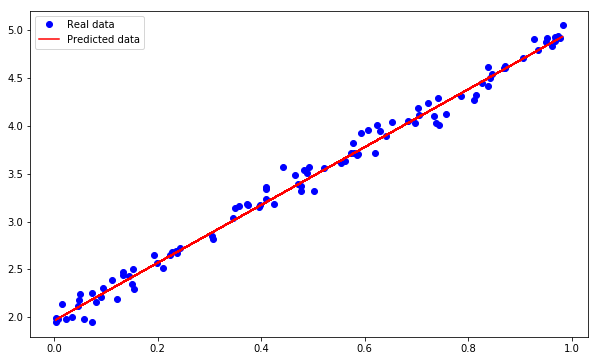

In [74]:
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()

In [75]:
w

3.0252709

In [76]:
b

1.9637766